## **Sprint 2: H&M Personalized Fashion Recommendations**



___
**Atoosa Rashid** 

[GitHub](https://github.com/atoosa-r/)

[LinkedIn](https://www.linkedin.com/in/atoosarashid/) 
___

### **Table of Contents:** 

- [Introduction](#Introduction)
- [Preprocessing](#Preprocessing)
    - [Data Loading](#Data-Loading)
    - [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis-(EDA))
    - [Cleaning](#Cleaning)
- [Modelling](#Modelling)
    - [Collaborative Filtering](#Collaborative-Filtering)
- [Final Remarks](#Final-Remarks)

____

### **Introduction**

In this data analysis, we explore H&M Group datasets, including transactions, customer information, and article details. H&M Group operates globally with 53 online markets and approximately 4850 stores. The objective is to uncover insights for developing effective product recommendations.

Building on our previous Capstone Sprint, Sprint 2 focuses on:

- **Further Cleaning:** Ensuring data integrity by removing duplicates and handling missing values.
- **Advanced Preprocessing:** Enhancing data quality with text processing, including tokenizing product descriptions and removing stopwords.
- **Baseline Model Creation:** Developing an initial model using collaborative filtering and cosine similarity to identify customer preferences and generate personalized recommendations.

Our ultimate goal is to develop a robust recommendation system that enhances the shopping experience, reduces returns, and mitigates environmental impacts. This involves continuous improvement through advanced techniques and additional data, providing H&M with a powerful tool to drive customer engagement and satisfaction.

###  **Preprocessing**

### Data Loading
Let's load the data and import the Python packages we will be using. 

In [1]:
#Importing libraries: 

import numpy as np                 
import pandas as pd                  
import matplotlib.pyplot as plt      
import matplotlib.image as mpimg      
import seaborn as sns                 
import os
import time
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from collections import Counter

from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /Users/Atoosa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
pip install wordcloud  

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importing Dataframes:

articles_df=pd.read_csv("/Users/Atoosa/Desktop/data/hm/articles.csv")                #Clothing articles 

transactions_df=pd.read_csv("/Users/Atoosa/Desktop/data/hm/transactions_train.csv")  #Transaction information 

customers_df=pd.read_csv("/Users/Atoosa/Desktop/data/hm/customers.csv")              #Customer information 

**Data Dictionary:**

**articles df:**

Data on the articles of products in the transactions in transactions df by the customers in customer df.

- `article id`:int64, ID for each article. 
- `product_code`: int64, Code representing the product. 
- `prod_name`: object, Name of the product. 
- `product_type_no`: int64, Number representing the product type. 
- `product_type_name` : object, Name of the product type. 
- `product_group_name`: object, Group name of the product. 
- `graphical_appearance_no`: int64, Number representing the graphical appearance. 
- `graphical_appearance_name`: object, Name reopresenting the graphical appearance. 
- `colour_group_code`: int64, Code representing the colour group.
- `colour_group_name`: object, Name of the colour group.
- `perceived_colour_value_id`: int64, ID for perceived color value.
- `perceived_colour_value_name`: object, Name for perceived color value.
- `perceived_colour_master_id`: int64, ID for perceived color master.
- `perceived_colour_master_name`: object, Name for perceived color master.
- `department_no`: int64, Number representing the department.
- `department_name`:object, Name of the department.
- `index_code`: object, Code for the index.
- `index_name`: object, Name for the index
- `index_group_no`: int64, Number representing the index group
- `index_group_name`: object, Name of the index group. 
- `section_no`: int64, Number representing the section. 
- `section_name`: object, Name of the section 
- `garment_group_no`: int64, Number representing the graphical appearance.
- `garment_group_name`:object, Name of the graphical appearance.
- `detail_desc`: object

**customers df** 

Data on the customers involved in making the transactions found in transactions df and articles of products found in articles df.

- `customer_id`: object, individual unique customer id #. This column is also present in transactions df 
- `FN`: float64
- `Active`: float64 
- `club_member_status`: object 
- `fashion_news_frequency`: object 
- `age`: float64
 - `postal_code`: object 

**transactions df**

Data on the transactions being made to purchase the articles of products found in the articles df by the customers found in the customers df. Note: The prices are not real prices, they are altered.


- `t_dat`: object, transaction date
- `customer_id`: object, individual unique customer id #. This column is also present in customers df 
- `article_id`: int64
- `price`: float64


___
### **Cleaning**

To start our cleaning, the datasets will be reviewed for any duplicate entries.

In [9]:
#Checking for duplicates:

print(f'Duplicated columns: {articles_df.T.duplicated().any()}')

print(f'Duplicated rows: {articles_df.duplicated().any()}')

print(f'Total of duplicates: {articles_df.duplicated().sum()}')

Duplicated columns: False
Duplicated rows: False
Total of duplicates: 0


In [10]:
#Checking for duplicates:

print(f'Duplicated rows: {customers_df.duplicated().any()}')

print(f'Total of duplicates: {customers_df.duplicated().sum()}')

Duplicated rows: False
Total of duplicates: 0


In [11]:
#Checking for duplicates:

print(f'Total of duplicates: {transactions_df.duplicated().any()}')

print(f'Total of duplicates: {transactions_df.duplicated().sum()}')

Total of duplicates: True
Total of duplicates: 2974905


The transactions_df contains some duplicate rows. To decide how to handle these duplicates, we'll review the flagged rows in detail.

In [12]:
# Finding all duplicate rows:

duplicates = transactions_df[transactions_df.duplicated(keep=False)]

# Viewing the duplcated transaction: 

duplicates

t_dat                                        customer_id  \
14        2018-09-20  000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
15        2018-09-20  000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
17        2018-09-20  000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
18        2018-09-20  000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
19        2018-09-20  000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...              ...                                                ...   
31788282  2020-09-22  ff6f55a51af284b71dcd264396b299e548f968c1769e71...   
31788291  2020-09-22  ff94f31e864d9b655643ac4d2adab3611c7241adb5d34c...   
31788292  2020-09-22  ff94f31e864d9b655643ac4d2adab3611c7241adb5d34c...   
31788311  2020-09-22  ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...   
31788312  2020-09-22  ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...   

          article_id     price  sales_channel_id  
14         501820043  0.016932                 2  
15         501820043  0.016932                 2  
17         671505001  0.033881                 2  
18         671505001  0.033881                 2  
19         631848002  0.033881                 2  
...              ...       ...               ...  
31788282   919786002  0.042356                 2  
31788291   901666001  0.084729                 2  
31788292   901666001  0.084729                 2  
31788311   791587021  0.025407                 2  
31788312   791587021  0.025407                 2  

[5518813 rows x 5 columns]

The identified duplicate rows in our dataset represent repeated transactions, where customers purchased multiple units of the same item in a single transaction. The majority of these duplicates occur in pairs, further indicating that customers bought two items. Dropping these rows would lead to:

1. Inaccurate Sales Data: Each row reflects actual sales. Removing them would underreport sales figures and revenue.
2. Incomplete Customer Behavior Analysis: Retaining all rows ensures a comprehensive understanding of customer purchasing patterns, which is vital for the analysis.

**Therefore, to maintain data integrity and accuracy, we will not drop these duplicate rows.**

Next, the datasets will be examined for any null values present.

In [13]:
#Checking for null values: 

articles_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [14]:
#Creating series for null values:

nulls = pd.isnull(articles_df["detail_desc"])  
    
#Filtering data for rows with desc nulls:

articles_df[nulls] 

article_id  product_code                   prod_name  product_type_no  \
1467    351332007        351332        Marshall Lace up Top              252   
2644    420049002        420049                  OL TAGE PQ               87   
2645    420049003        420049                  OL TAGE PQ               87   
2742    426199002        426199  Ellen Shortie Daisy Low 3p              286   
2743    426199010        426199  Ellen Shortie Daisy Low 3p              286   
...           ...           ...                         ...              ...   
67838   752458001        752458           Poissy boho dress              265   
72720   768842001        768842                 Andrews set              270   
72721   768842004        768842                 Andrews set              270   
93144   856985001        856985                   Pogo rope               67   
95624   867200001        867200              Necklace Simon               77   

      product_type_name  product_group_name  graphical_appearance_no  \
1467            Sweater  Garment Upper body                  1010018   
2644              Boots               Shoes                  1010016   
2645              Boots               Shoes                  1010016   
2742   Underwear bottom           Underwear                  1010016   
2743   Underwear bottom           Underwear                  1010017   
...                 ...                 ...                      ...   
67838             Dress   Garment Full body                  1010007   
72720       Garment Set   Garment Full body                  1010017   
72721       Garment Set   Garment Full body                  1010004   
93144              Belt         Accessories                  1010016   
95624          Necklace         Accessories                  1010011   

      graphical_appearance_name  colour_group_code colour_group_name  ...  \
1467                  Treatment                  7              Grey  ...   
2644                      Solid                 13             Beige  ...   
2645                      Solid                 23       Dark Yellow  ...   
2742                      Solid                  9             Black  ...   
2743                     Stripe                  8         Dark Grey  ...   
...                         ...                ...               ...  ...   
67838                Embroidery                 10             White  ...   
72720                    Stripe                 10             White  ...   
72721                     Check                 73         Dark Blue  ...   
93144                     Solid                 12       Light Beige  ...   
95624                  Metallic                  3            Silver  ...   

         department_name index_code          index_name index_group_no  \
1467     Jersey Fancy DS          D             Divided              2   
2644     Premium Quality          C  Ladies Accessories              1   
2645     Premium Quality          C  Ladies Accessories              1   
2742     Casual Lingerie          B    Lingeries/Tights              1   
2743     Casual Lingerie          B    Lingeries/Tights              1   
...                  ...        ...                 ...            ...   
67838              Dress          A          Ladieswear              1   
72720     Baby Boy Woven          G    Baby Sizes 50-98              4   
72721     Baby Boy Woven          G    Baby Sizes 50-98              4   
93144              Belts          C  Ladies Accessories              1   
95624  Small Accessories          F            Menswear              3   

       index_group_name section_no            section_name garment_group_no  \
1467            Divided         58        Divided Selected             1005   
2644         Ladieswear         64            Womens Shoes             1020   
2645         Ladieswear         64            Womens Shoes             1020   
2742         Ladieswear         61         Womens L

There are 416 missing values in the `detail_desc` column. Given that the dataset contains 105,542 rows, and these missing values constitute less than 0.4% of the total entries, they will be dropped to maintain data quality.


In [15]:
# Removing rows with null values in detail_desc:

articles_df.dropna(subset=['detail_desc'], inplace=True)

#Sanity Check:

nulls = articles_df['detail_desc'].isnull().sum()

print(f"Number of null values in detail_desc after dropping: {nulls}")

Number of null values in detail_desc after dropping: 0


In [16]:
#Checking for null values: 

customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

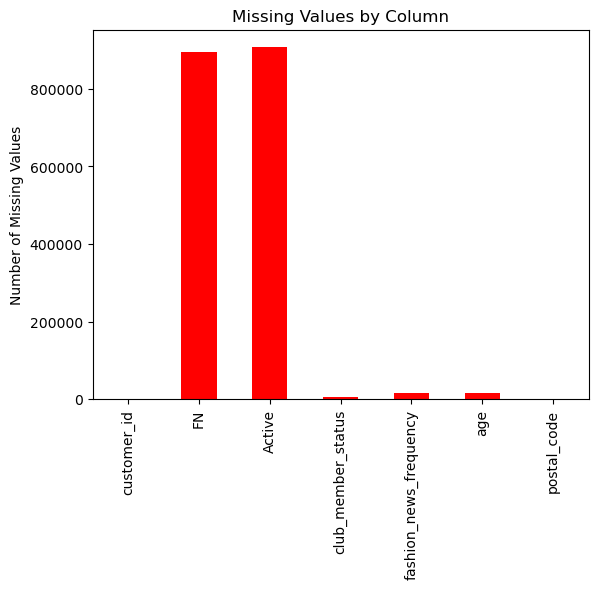

In [17]:
#Plotting Null or Missing values

missing_values = customers_df.isna().sum()

missing_values.plot(kind='bar', title='Missing Values by Column', color='red')

plt.ylabel('Number of Missing Values')

plt.show()

The customers_df contains many null values. However, for the purpose of this analysis, the customer_df columns with null values will not be extensively analyzed. The recommendation systems will only involve the customer_id column, which does not contain any null values.

In [18]:
#Checking for null values: 

transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

Our transactions dataframe is free of any nulls.

___
#### Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis to understand the structure, patterns, and key characteristics of the datasets. This includes summarizing the data, identifying missing values, and visualizing relationships between key variables to uncover insights that will inform our modeling approach.

In [19]:
#Shape of dataframes:

print(f"There are {articles_df.shape[0]} rows and {articles_df.shape[1]} columns in our articles dataframe.\n ")

print(f"There are {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns in our transactions dataframe.\n ")

print(f"There are {customers_df.shape[0]} rows and {customers_df.shape[1]} columns in our customers dataframe. ")


There are 105126 rows and 25 columns in our articles dataframe.
 
There are 31788324 rows and 5 columns in our transactions dataframe.
 
There are 1371980 rows and 7 columns in our customers dataframe. 


In [58]:
#Sanity Check:

articles_df.head(20)

article_id  product_code                  prod_name  product_type_no  \
0    108775015        108775                  Strap top              253   
1    108775044        108775                  Strap top              253   
2    108775051        108775              Strap top (1)              253   
3    110065001        110065          OP T-shirt (Idro)              306   
4    110065002        110065          OP T-shirt (Idro)              306   
5    110065011        110065          OP T-shirt (Idro)              306   
6    111565001        111565        20 den 1p Stockings              304   
7    111565003        111565        20 den 1p Stockings              302   
8    111586001        111586  Shape Up 30 den 1p Tights              273   
9    111593001        111593   Support 40 den 1p Tights              304   
10   111609001        111609          200 den 1p Tights              304   
11   112679048        112679             SWEATSHIRT  OC              252   
12   112679052        112679             SWEATSHIRT  OC              252   
13   114428026        114428          Alice BANDEAU 2-p              306   
14   114428030        114428          Alice BANDEAU 2-p              306   
15   116379047        116379          Frugan longsleeve              254   
16   118458003        118458       Jerry jogger bottoms              272   
17   118458004        118458       Jerry jogger bottoms              272   
18   118458028        118458       Jerry jogger bottoms              272   
19   118458029        118458       Jerry jogger bottoms              272   

   product_type_name  product_group_name  graphical_appearance_no  \
0           Vest top  Garment Upper body                  1010016   
1           Vest top  Garment Upper body                  1010016   
2           Vest top  Garment Upper body                  1010017   
3                Bra           Underwear                  1010016   
4                Bra           Underwear                  1010016   
5                Bra           Underwear                  1010016   
6   Underwear Tights      Socks & Tights                  1010016   
7              Socks      Socks & Tights                  1010016   
8    Leggings/Tights  Garment Lower body                  1010016   
9   Underwear Tights      Socks & Tights                  1010016   
10  Underwear Tights      Socks & Tights                  1010016   
11           Sweater  Garment Upper body                  1010001   
12           Sweater  Garment Upper body                  1010001   
13               Bra           Underwear                  1010017   
14               Bra           Underwear                  1010016   
15               Top  Garment Upper body                  1010016   
16          Trousers  Garment Lower body                  1010010   
17          Trousers  Garment Lower body                  1010010   
18          Trousers  Garment Lower body                  1010016   
19          Trousers  Garment Lower body                  1010010   

   graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                      Solid                  9             Black  ...   
1                      Solid                 10             White  ...   
2                     Stripe                 11         Off White  ...   
3                      Solid                  9             Black  ...   
4                      Solid                 10             White  ...   
5                      Solid                 12       Light Beige  ...   
6                      Solid                  9             Black  ...   
7                      Solid                 13             Beige  ...   
8                      Solid                  9             Black  ...   
9                      Solid                  9             Black  ...   
10                     Solid                  9             Black  ...   
11          All over pattern                  7              Grey  ..

In [21]:
#Reviewing datatypes: 

articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105126 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105126 non-null  int64 
 1   product_code                  105126 non-null  int64 
 2   prod_name                     105126 non-null  object
 3   product_type_no               105126 non-null  int64 
 4   product_type_name             105126 non-null  object
 5   product_group_name            105126 non-null  object
 6   graphical_appearance_no       105126 non-null  int64 
 7   graphical_appearance_name     105126 non-null  object
 8   colour_group_code             105126 non-null  int64 
 9   colour_group_name             105126 non-null  object
 10  perceived_colour_value_id     105126 non-null  int64 
 11  perceived_colour_value_name   105126 non-null  object
 12  perceived_colour_master_id    105126 non-null  int64 
 13  perc

In [22]:
#Sanity Check:  

customers_df.head(2)

customer_id  FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3... NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e... NaN     NaN   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...

In [23]:
#Reviewing datatypes: 

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [24]:
#Sanity Check:

transactions_df.head(2)

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2

In [25]:
#Reviewing datatypes: 

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


For the purposes of this analysis, the transaction date `t_dat` column will be converted to a datetime format.

In [26]:
# Converting t_dat column to datetime:

transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

#Sanity Check: 

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [27]:
# Calculating the minimum, maximum, and average price:

min_price = round(transactions_df['price'].min(), 5)

max_price = round(transactions_df['price'].max(), 5)

avg_price = round(transactions_df['price'].mean(), 5)

print(f'For the price column, the minimum price is {min_price}, the maximum is {max_price}, and the average price is {avg_price}.')

For the price column, the minimum price is 2e-05, the maximum is 0.59153, and the average price is 0.02783.


These values suggest that the prices have been adjusted for anonymity, likely through a scaling transformation. This adjustment preserves the relative differences between prices while obscuring the actual amounts, ensuring the data's privacy and confidentiality.


We can look further into the individual columns and review any trends that appear in our data. 

In [28]:
#Reviewing the index_group_name column:

articles_df['index_group_name'].value_counts()

index_group_name
Ladieswear       39523
Baby/Children    34619
Divided          15086
Menswear         12539
Sport             3359
Name: count, dtype: int64

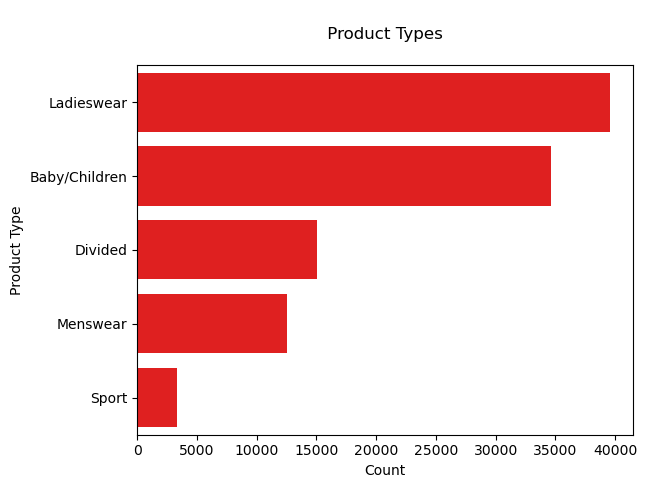

In [29]:
#Product count in index_group_name column:

product_type_counts = articles_df['index_group_name'].value_counts()

sns.barplot(x=product_type_counts.values, y=product_type_counts.index, color='red')

plt.title('\n Product Types \n')

plt.xlabel('Count')

plt.ylabel('Product Type')

plt.show()

From the above graph, it can be inferred that Ladieswear and Baby/Children products dominate the dataset, while Sport products are the least common.

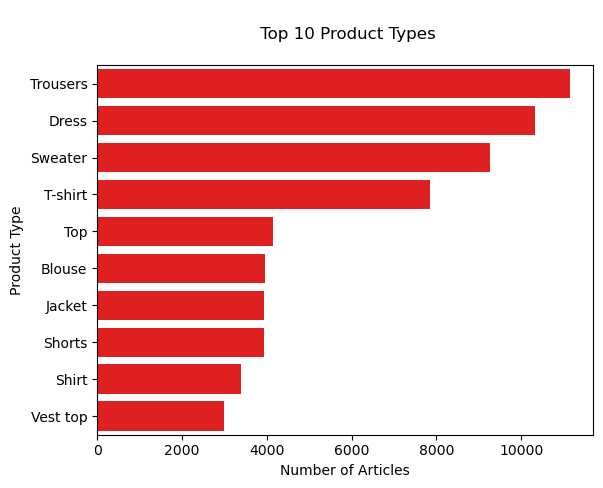

In [30]:
# Top 10 Articles by Product Type

product_type_counts = articles_df['product_type_name'].value_counts().head(10)

sns.barplot(x=product_type_counts.values, y=product_type_counts.index, color='red')

plt.title('\n Top 10 Product Types\n')

plt.xlabel('Number of Articles')

plt.ylabel('Product Type')

plt.show()

Based on the above graph, it can be inferred that trousers and dresses are the most prevalent articles in the dataset, indicating a potential emphasis on these clothing types. The data also reveals a diverse range of other popular clothing items, showcasing the variety within the top 10 product types.

Let's review the articles_df `detail_desc` column which we will be using for our future NLP models. 

In [31]:
#Initial review of the descriptions 

# Adjusting the display options:

pd.set_option('display.max_colwidth', None)

# Getting the unique descriptions:

unique_descriptions = articles_df['detail_desc'].unique()

# Printing the unique descriptions:

for desc in unique_descriptions:
    
    print(desc)

Jersey top with narrow shoulder straps.
Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.
Semi shiny nylon stockings with a wide, reinforced trim at the top. Use with a suspender belt. 20 denier.
Tights with built-in support to lift the bottom. Black in 30 denier and light amber in 15 denier.
Semi shiny tights that shape the tummy, thighs and calves while also encouraging blood circulation in the legs. Elasticated waist.
Opaque matt tights. 200 denier.
Sweatshirt in soft organic cotton with a  press-stud on one shoulder (sizes 12-18 months and 18-24 months without a press-stud). Brushed inside.
Two soft bandeau bras in soft jersey with side support and a silicone trim at the top.
Fitted top in soft stretch jersey with a wide neckline and long sleeves.
Trousers in sweatshirt fabric with an elasticat

**To effectively analyze and work with our article descriptions, we'll start by preprocessing the descriptions. Our preprocessing involves several key steps to prepare the text data for word embedding:**

1. Lowercasing: Converts all characters to lowercase for uniformity and case insensitivity.
2. Removing Punctuation: Eliminates punctuation marks to reduce noise and simplify the text.
3. Tokenizing: Splits the text into individual words, facilitating further analysis.
4. Removing Stopwords: Removes common words that do not add significant meaning, enhancing focus on important words.

These preprocessing steps are crucial as they reduce noise, ensure data uniformity, and enhance the quality of word embeddings, leading to more accurate and efficient text analysis.

We'll start by creating our custom tokenizer that will help with the preprocessing of the descriptions. 

In [32]:
# Initialize the stopwords list:

ENGLISH_STOP_WORDS = set(stopwords.words('english'))

#Creating custom tokenizer function:

def my_custom_tokenizer(sentence):

    if not isinstance(sentence, str):

        return ""
    
    # Lowercasing
    sentence = sentence.lower()

    # Removing punctuation
    sentence = re.sub(f"[{re.escape(string.punctuation)}]", " ", sentence)

    # Splitting into words
    words = sentence.split()

    # Removing stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS and word]

    # Reconstructing the sentence
    cleaned_sentence = ' '.join(words)

    return cleaned_sentence

In [33]:
# Applying our preprocessing to the 'detail_desc' column:

articles_df['preprocessed_detail_desc'] = articles_df['detail_desc'].apply(my_custom_tokenizer)

Having completed the text preprocessing, we can now visualize the data to identify any initial patterns within our descriptions. We will begin by plotting the top 10 words for each group in the `index_group_name` column. Following this, we will create a word cloud to provide an overall view of the most frequent terms across all descriptions.

In [34]:
#Creating function to plot top 10 words:

def plot_top_words(group, title):

    word_counter = Counter()

    for desc in group:

        word_counter.update(desc.split())
    
    top_words = word_counter.most_common(10)

    words = [word for word, _ in top_words]

    counts = [count for _, count in top_words]
    
    plt.figure(figsize=(7, 4))

    plt.bar(words, counts, color='red')

    plt.title(f'Top 10 Words in Descriptions for {title} \n')

    plt.xticks(rotation=45)
    
    plt.show()

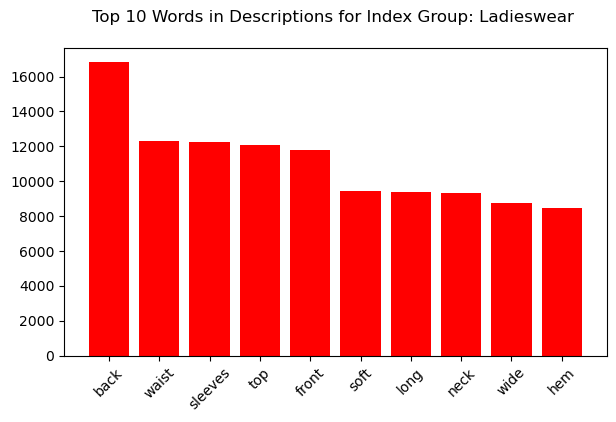

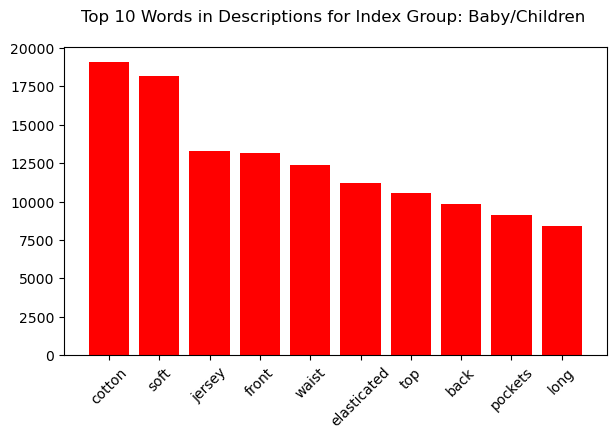

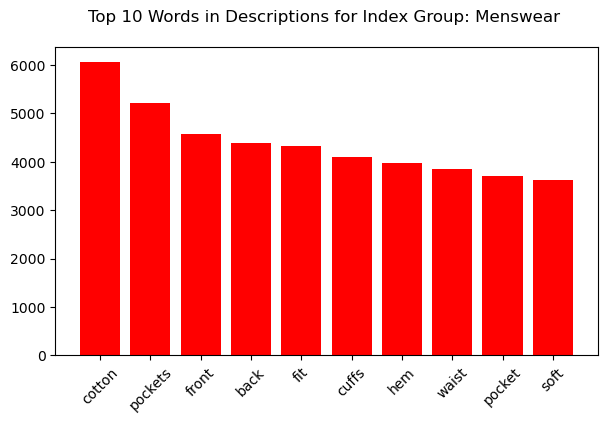

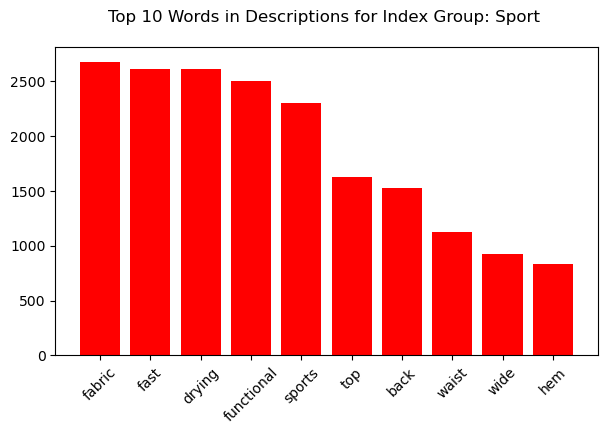

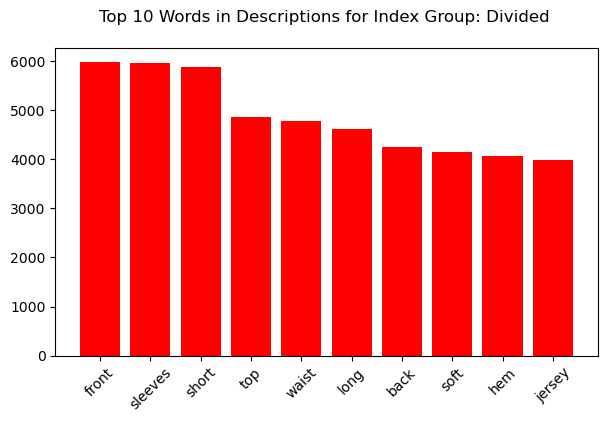

In [35]:
# Plotting top 10 words by index_group_name:

index_groups = articles_df['index_group_name'].unique()

for index_group in index_groups:

    group = articles_df[articles_df['index_group_name'] == index_group]['preprocessed_detail_desc']
    
    plot_top_words(group, f'Index Group: {index_group}')

The bar charts above highlight the most common words in product descriptions across various index groups. Terms like "front," "sleeves," and "cotton" appear frequently, reflecting a focus on specific clothing features and materials. Each index group emphasizes different aspects, such as comfort in Baby/Children's wear and performance in Sport.

In [36]:
# Generating our word cloud from the preprocessed descriptions:

text = ' '.join(articles_df['preprocessed_detail_desc'].dropna())

wordcloud = WordCloud(max_words=100, background_color='white', colormap='Reds').generate(text)

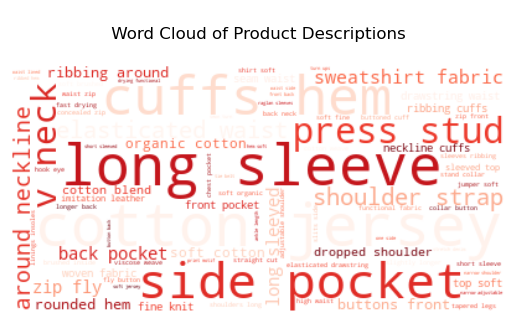

In [37]:
# Printing the word cloud of our descriptions:

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title('\n Word Cloud of Product Descriptions \n')

plt.show()

The word cloud provides a visual summary of the most common terms found in the product descriptions. Prominent words such as "cotton," "long," "sleeve," "pocket," and "cuffs" indicate frequent mentions of fabric types, garment parts, and specific clothing features.

___
### **Modelling**

#### Collaborative Filtering (Item-Based)


To manage the large size of our transactions_df (which contains over 31 million transactions), the analysis will be focused on the most recent data. This approach ensures that the analysis is both manageable and focused on the most recent and relevant data.

In [38]:
# Getting the maximum date in the 't_dat' column and calculating the start date as 2 weeks before the end date: 

end_date = transactions_df['t_dat'].max()

start_date = end_date - pd.DateOffset(weeks=2)

# Filtering the dataframe to include only the last 2 weeks of data:

transactions = transactions_df[transactions_df['t_dat'] >= start_date]

transactions.head()

# Printing the shape of the filtered dataframe:

print(transactions.shape)

(531967, 5)


In [39]:
#Checking the number of unique items(articles) present in the transactions dataframe:

transactions['article_id'].nunique()

23083

In [40]:
# Aggregating transactions to get the count of each article purchased by each customer:

R = transactions.groupby(by=['customer_id', 'article_id']).size().reset_index(name='unit_number')

#Sanity Check: 

R.head(10)

customer_id  \
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318   
1  0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a   
2  0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a   
3  0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94   
4  0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441   
5  00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793   
6  0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55   
7  0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55   
8  0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55   
9  0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55   

   article_id  unit_number  
0   794321007            1  
1   448509014            1  
2   719530003            1  
3   734592001            1  
4   910601002            1  
5   624486001            1  
6   621381012            1  
7   640021012            1  
8   827487003            1  
9   880017001            2

In [41]:
#Ensuring aggregation includes all transactions for each customer by testing with one customer:

R[R['customer_id']=='ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264']  

customer_id  \
470187  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264   
470188  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264   
470189  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264   
470190  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264   

        article_id  unit_number  
470187   689365050            1  
470188   762846027            1  
470189   794819001            1  
470190   884081001            1

**Creating User-Item matrix**

In order to implement our recommendations we will need a User-Item matrix. We'll use the pivot method to create the matrix. The `customer_id` is set as the index, `article_id` as the columns, and `unit_number` as the values. This matrix represents the number of units purchased by each customer for each article.

In [42]:
#Alternative method to creating our matrix:
#Creating a Zero Matrix:
#R_df = np.zeros((R['customer_id'].nunique(), R['article_id'].nunique()))

#Converting the Zero Matrix to a DataFrame:
#col_df = pd.DataFrame(R_df, index =  R['customer_id'].unique(), columns = R['article_id'].unique())

In [43]:
# Creating the user-item matrix:

filled_matrix = R.pivot(index='customer_id', columns='article_id', values='unit_number')

/var/folders/l1/k9mr3spx3dn2jgmrm71ncb800000gn/T/ipykernel_4799/616948156.py:3: PerformanceWarning: The following operation may generate 3136910451 cells in the resulting pandas object.
  filled_matrix = R.pivot(index='customer_id', columns='article_id', values='unit_number')


In [44]:
#Checking null values: 

filled_matrix.isna().sum()

article_id
108775044    135893
111565001    135851
111586001    135795
111593001    135811
111609001    135868
              ...  
952267001    135872
952938001    135888
953450001    135883
953763001    135874
956217002    135880
Length: 23083, dtype: int64

Since our matrix has `article_id` as columns and `customer_id` as the index, it is inevitable that there will be many null values. This is because customers typically do not purchase the entire catalog of articles available. These null values will need to be filled with 0s to prepare for the subsequent cosine similarity calculation.

In [45]:
# Processing each row to replace NaN with 0:

for index, row in filled_matrix.iterrows():
    filled_matrix.loc[index] = row.fillna(0)

#Sanity Check:

filled_matrix.head()

article_id                                                        108775044  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        111565001  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        111586001  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        111593001  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        111609001  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        120129001  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        120129014  \
customer_id                                                                   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318        0.0   
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a        0.0   
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94        0.0   
0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441        0.0   
00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793        0.0   

article_id                                                        123173001  \
customer_id                                

In [46]:
#Checking a random article_id to ensure accurate unit numbers:

filled_matrix.value_counts(108775044)

108775044
0.0    135893
1.0         2
2.0         2
Name: count, dtype: int64

Our matrix now accurately displays the number of units and the null values have been filled in with zeros. 

#### **Cosine Similarity**

Now that the User-Item matrix is ready, we can proceed with finding the cosine similarity between the customers and using those for our recommendation system. 

In [47]:
#Creating an empty matrix for our cosine similarities: 

cosine_similarities = np.zeros((filled_matrix.shape[0], filled_matrix.shape[0]))

#Sanity Check: 

cosine_similarities.shape

(135897, 135897)

Due to computational constraints, we will be limiting our analysis to customers with an order count greater than 10. This decision is not only practical from a technical perspective but also aligns with our goal to focus on returning customers. By concentrating our efforts on this segment, we can provide more meaningful and relevant recommendations tailored to their purchasing patterns and behaviors. This targeted approach ensures that our insights are valuable and actionable for those who engage with our services the most.

In [48]:
#Limiting the customers down to only those who have made more than 10 purchases: 

cnt = (filled_matrix.sum(axis = 1).sort_values(ascending = False) > 10).sum()

In [49]:
#Selecting the first cnt rows and all columns from the filled_matrix DataFrame:

filtered_matrix_ = filled_matrix.iloc[:cnt, :].astype(np.int8)

In [50]:
#Checking the time required to run our function for our cosine similarity: 

start = time.time()

for idx, data in enumerate(filtered_matrix_.iterrows()):  #Iterating over the rows of the filtered_matrix_
    
    row = data[1].values.reshape(1,-1)  #Reshaping the row data for cosine similarity calculation
    
    for idx2, data2 in enumerate(filtered_matrix_.iterrows()):  #This inner loop iterates over each row again, creating pairs of rows to compute their cosine similarity
        
        row2 = data2[1].values.reshape(1,-1)  #Reshapes the second row data similarly to the first row
        
        simi = cosine_similarity(row, row2)  #Calculating the cosine similarity between the two rows
        
        cosine_similarities[idx, idx2] = simi  #Storing the calculated cosine similarity in the pre-defined matrix cosine_similarities

    break  #This break statement exits the outer loop after the first row, meaning only the cosine similarities for the first row with all other rows are calculated
        
end = time.time()

print(((end - start)* cnt)/3600)

7.195363312959671


Although, as shown above, the function is predicted to run for 5.5 hours, the code runs much faster than that.  

In [51]:
#Calculating our cosine similarities for all rows and filling in our matrix: 

cosine_similarities= cosine_similarity(filtered_matrix_, filtered_matrix_)

Our cosine_similarities are in a 2D array where each entry `[i]` `[j]` represents the similarity score between `customer i` and `customer j`. 

In [52]:
#Sanity Check: 

print(cosine_similarities)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Now that our cosine similarities have been calcualted, we can proceed with creating our function to produce our recommendations and check the individual customer recommendations. 

In [53]:
#Pulling up customer IDs for testing: 

example_cx = filled_matrix.iloc[:cnt, :].index

print(f'Customer IDs to test our Recommendation System:\n \n {example_cx}')

Customer IDs to test our Recommendation System:
 
 Index(['000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
       '0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a',
       '0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94',
       '0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441',
       '00039306476aaf41a07fed942884f16b30abfa83a2a8bea972019098d6406793',
       '0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55',
       '00040239317e877c77ac6e79df42eb2633ad38fcac09fc0094e549180ddc201c',
       '000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9',
       '000525e3fe01600d717da8423643a8303390a055c578ed8a97256600baf54565',
       '0006bb0fad5c49341bd9cece264271e68e01a4e55f22ec9efffc43b0b3bdbc34',
       ...
       '0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0',
       '0efcc8a0abbdede3675afce330cbe60b2308fb14302e9cc96b4733b6a0546d60',
       '0efe16e24820bbf5e28ad655a2b83e

In [54]:
#Select a specific customer from the above list to produce recommendations for: 

specific_customer_id = '0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0'  

In [55]:
#Collaborative Filtering Reccomendation System 1.0: 
 
if specific_customer_id in filled_matrix.index:

    customer_index = filled_matrix.index.get_loc(specific_customer_id)

    similar_customers = cosine_similarities[customer_index]  #To get the similarity scores between the specified customer and all other customers
    
    # Only getting the top 5 most similar customers:

    top_indices = np.argsort(similar_customers)[-5:]  #sorting the indices of the similar_customers array in ascending order and then slicing the last 5 indices, which correspond to the 5 highest similarity scores
    
    # Let's get the recommended articles:

    recommended_article_ids = filled_matrix.columns[top_indices] #using the indices of the top similar customers to select the corresponding article columns from the filled_matrix 
    
    # Getting the product names for the recommended articles:

    recommended_articles = articles_df[articles_df['article_id'].isin(recommended_article_ids)]
    
    recommended_prod_names = recommended_articles[['article_id', 'prod_name']].reset_index(drop=True)
    
    # Printing the recommendations in a better format:
    
    print("Recommended Articles:\n")

    for index, row in recommended_prod_names.iterrows():

        print(f"Article ID: {row['article_id']}, Product Name: {row['prod_name']}")

#We are only doing this recommendation for customers who have made at least 5 purchases so we are putting this else statement just in case:

else:

    print(f"Customer ID {specific_customer_id} not found in the index.")

Recommended Articles:

Article ID: 433414020, Product Name: Maria NT 2-pack
Article ID: 663382005, Product Name: Winston chelsea boot
Article ID: 674606004, Product Name: CHARLIE SKIRT
Article ID: 749878001, Product Name: Func. Ingela snow jacket
Article ID: 783346030, Product Name: Primo slacks


Our recommendation system is performing well, but it can be enhanced further by incorporating the images associated with each article ID. Since we have access to all the images, we will display them using the matplotlib and os libraries. We'll begin by importing our images and defining a function for displaying them. 

**Note:** The images are organized into folders based on the first three digits of the article_id. Additionally, the image file names include a leading '0'. For example, an article with ID 123173001 is located in the 012 folder, and the image file name is 0123173001.jpg. This will be accounted for in our function below. 

In [56]:
# Path to the images directory:

images_path = '/Users/Atoosa/Desktop/data/hm/images'

# Function to display images using matplotlib:

def display_image(image_path):

    img = mpimg.imread(image_path) #Reading in the image located at the path specified by image_path and loading it into a numpy array named img

    plt.imshow(img)

    plt.axis('off') 
    
    plt.show()

Recommended Articles:

Article ID: 433414020, Product Name: Maria NT 2-pack


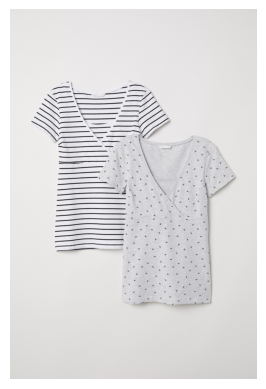

Article ID: 663382005, Product Name: Winston chelsea boot


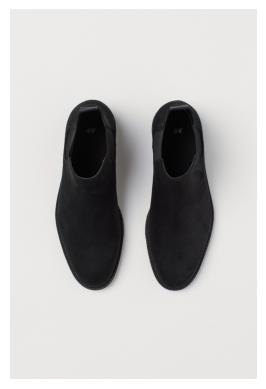

Article ID: 674606004, Product Name: CHARLIE SKIRT


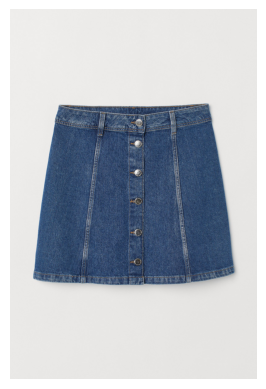

Article ID: 749878001, Product Name: Func. Ingela snow jacket


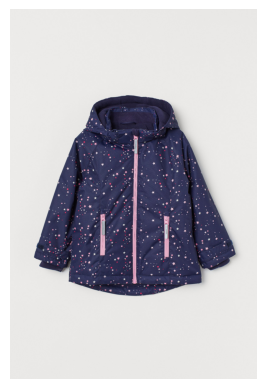

Article ID: 783346030, Product Name: Primo slacks


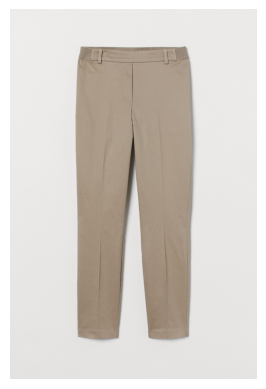

In [57]:
#Collaborative Filtering Reccomendation System 2.0 (incorporating images): 

# First checking if the customer ID exists in the index since we removed some customers:

if specific_customer_id in filled_matrix.index:

    customer_index = filled_matrix.index.get_loc(specific_customer_id)

    similar_customers = cosine_similarities[customer_index]  # To get the similarity scores between the specified customer and all other customers.

    # Only getting the top 5 most similar customers:

    top_indices = np.argsort(similar_customers)[-5:]  # sorting the indices of the similar_customers array in ascending order and then slicing the last 5 indices, which correspond to the 5 highest similarity scores

    # Let's get the recommended articles:

    recommended_article_ids = filled_matrix.columns[top_indices]  # using the indices of the top similar customers to select the corresponding article columns from the filled_matrix 

    # Getting the product names for the recommended articles:

    recommended_articles = articles_df[articles_df['article_id'].isin(recommended_article_ids)]

    recommended_prod_names = recommended_articles[['article_id', 'prod_name']].reset_index(drop=True)

    # Printing the recommendations:

    print("Recommended Articles:\n")

    for index, row in recommended_prod_names.iterrows():

        article_id = row['article_id']

        prod_name = row['prod_name']
        
        # Generating the folder and image name:

        folder = '0' + str(article_id)[:2]

        image_name = '0' + str(article_id) + '.jpg'

        image_path = os.path.join(images_path, folder, image_name)
        
        print(f"Article ID: {article_id}, Product Name: {prod_name}")
        
        # Checking if the image exists:

        if os.path.exists(image_path):

            # Displaying the image:

            display_image(image_path)

        else:

            print(f"Image for Article ID: {article_id} not found.")
        
# We are only doing this recommendation for customers who have made at least 5 purchases so we are putting this else statement just in case:

else:
    
    print(f"Customer ID {specific_customer_id} not found in the index.")


___

#### **Final Remarks**





The personalized recommendation system successfully identifies and suggests relevant fashion items to customers based on their purchase history and product preferences. By employing collaborative filtering, we created a model that effectively matches customers with products they are likely to appreciate.

Moving forward, we plan to enhance our model by integrating advanced preprocessing methods, such as word embeddings, and incorporating additional customer data. This will enable us to refine our recommendations further and explore hybrid models that combine both content-based and collaborative filtering approaches. Our ultimate goal is to ensure computational efficiency and accuracy, providing H&M with a powerful tool to drive customer engagement and satisfaction.